In [6]:
from pyqrcode import QRCode
import pyqrcode
import png
import os
import cv2
from fpdf import FPDF
pdf=FPDF()
import img2pdf
import matplotlib.pyplot as plt

In [7]:
present_dir=os.getcwd()

In [44]:
def create_sheet(num_q, state_id, state_name):
    d=state_id
    sheet=cv2.imread('Sheet%d.png'%num_q)
    encoding=(str(num_q)+":"+str(state_id)+":"+str(state_name)).upper()
    qr_code=pyqrcode.create(content=encoding, error='L',version=3)
    qr_code.png(present_dir+"\%dencoding.png"%d, scale=15)
    QR=cv2.imread(present_dir+"\%dencoding.png"%d)
    y=QR.shape[0]
    x=QR.shape[1]
    font=cv2.FONT_HERSHEY_DUPLEX 
    vert_offset=1780 ##along x axis
    hor_offset=500 ##along y axis
    sheet[hor_offset:hor_offset+x,vert_offset:vert_offset+y,]=QR
    cv2.imwrite(present_dir+"\%dencoding.png"%d, sheet)
    copy=cv2.imread(present_dir+"\%dencoding.png"%d)
    base=1050
    thickness=3
    size=1.5
    color=(0,0,0) ##black text
    '''
    cv2.putText(copy, 'Test:%s'%test_name, (vert_offset-100, base),font, size,color,thickness,cv2.LINE_AA)
    cv2.putText(copy, 'School:%s'%school_name, (vert_offset-100, base+60),font, size,color,thickness,cv2.LINE_AA)
    cv2.putText(copy, 'Class:%s'%class_id, (vert_offset-100, base+120),font, size, color, thickness,cv2.LINE_AA)
    cv2.putText(copy, 'Section:%s'%section_id, (vert_offset-100, base+180),font, size, color ,thickness,cv2.LINE_AA)    
    '''
    cv2.putText(copy, 'State:%s'%state_name, (vert_offset, base+100),font, size, color ,thickness,cv2.LINE_AA)
    
    cv2.imwrite(present_dir+r"\%dencoding.png"%d, copy)
    with open(present_dir+r"\PDFs\{}({})_{}.pdf".format(*[state_id, state_name,num_q]), "wb") as f:
        f.write(img2pdf.convert(present_dir+"\%dencoding.png"%d))
    os.remove(present_dir+r"\%dencoding.png"%d)

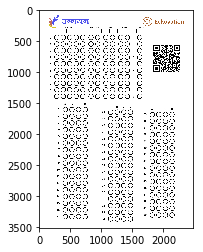

In [46]:
##create_sheet(50, 123456, "BIHAR")